In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

from collections import defaultdict

import keras
import keras.backend as K
from keras.layers import Dense, GlobalAveragePooling1D, Embedding
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(7)
# 函數可以保證生成的隨機數具有可預測性

Using TensorFlow backend.
/opt/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 前處理加上head

In [2]:
col_names=['label','text']

In [3]:
df = pd.read_csv('./data/hotel_nolabel_clean1.csv',encoding='utf8',names=col_names)

In [4]:
df.head(5)

,label,text
0,1,my daughter and i just returned from a four ni...
1,1,big mistake .
2,1,our room was tiny
3,1,and the bath was small too .
4,1,the public areas were somewhat dingy and showe...


# 切割資料集 20%測試

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
import pandas as pd

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
train, test = train_test_split(df, test_size = 0.2 )

In [7]:
#原本資料
df.shape

(24033, 2)

In [8]:
# 訓練資料集共有
train.shape

(19226, 2)

In [9]:
train.head(5)

,label,text
11537,1,i was really looking forward to spend my husba...
12862,2,we ate at cafe mickey twice lots of characters...
6861,1,it certainly wasn ' t obvious the ac was turne...
3040,2,the all empowering breakfast who needs lunch ...
22039,2,huge rooms with much better views than the fou...


In [10]:
# 先存成txt  看要轉csv 或 txt都可以
train.to_csv('./data/hotel_labelhead_only12_train.txt', index=None)

In [11]:
# 測試資料集共有
test.shape

(4807, 2)

In [12]:
test.head(5)

,label,text
11936,2,nice bathroom - not sumptuous but attractive ...
22543,1,i think we ordered a buffet breakfast that all...
12972,2,the park is smaller and more managable than th...
17891,1,and public transportation system were not runn...
15528,2,the location is surperb which all the previous...


In [13]:
# 先存成txt  看要轉csv 或 txt都可以
test.to_csv('./data/hotel_labelhead_only12_test.txt', index=None)

# 載入資料集

In [2]:
df = pd.read_csv('./data/hotel_label_head1.txt')

In [3]:
df.head(5)

,label,text
0,1,my daughter and i just returned from a four ni...
1,1,big mistake .
2,1,our room was tiny
3,1,and the bath was small too .
4,1,the public areas were somewhat dingy and showe...


In [4]:
type(df.label)

pandas.core.series.Series

In [5]:
#label共有 19226個值  都是1跟2
len(df.label)

24033

In [6]:
#存進y裡面  並且轉np.array
y = np.array(df.label)

In [7]:
type(y)

numpy.ndarray

In [8]:
# 確認值沒有變 19226
len(y)

24033

In [9]:
y[19225]

1

In [10]:
# 看一下前10筆
print(y[0:10])

[1 1 1 1 1 1 1 1 1 1]


In [11]:
y = to_categorical(y)

In [12]:
type(y)

numpy.ndarray

In [13]:
#看一下前10筆
print(y[0:10])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# 1. **Few Preprocessings**

In traditional NLP tasks, preprocessings play an important role, but...

## **Low-frequency words**
In my experience, fastText is very fast, but I need to delete rare words to avoid overfitting.

**NOTE**:
Some keywords are rare words, such like *Cthulhu* in *Cthulhu Mythos* of *Howard Phillips Lovecraft*.
But these are useful for this task.

## **Removing Stopwords**

Nothing.
To identify author from a sentence, some stopwords play an important role because one has specific usages of them.

## **Stemming and Lowercase**

Nothing.
This reason is the same for stopwords removing.
And I guess some stemming rules provided by libraries is bad for this task because all author is the older author.

## **Cutting long sentence**

Too long documents are cut.

## **Punctuation**

Because I guess each author has unique punctuations's usage in the novel, I separate them from words.

e.g. `Don't worry` -> `Don ' t worry`

## **Is it slow?**

Don't worry! FastText is a very fast algorithm if it runs on CPU. 

In [14]:
counter = {name : defaultdict(int) for name in set(df.label)}
for (text, label) in zip(df.text, df.label):
    text = text.replace(' ', '')
    for c in text:
        counter[label][c] += 1
chars = set()
for v in counter.values():
    chars |= v.keys()
names = [label for label in counter.keys()]
print('c ', end='')
for n in names:
    print(n, end='   ')
print()
for c in chars:    
    print(c, end=' ')
    for n in names:
        print(counter[n][c], end=' ')
    print()

c 1   2   
} 1 1 
_ 1 0 
0 822 485 
o 64192 51116 
a 61296 56137 
b 12971 10559 
[ 5 9 
+ 36 24 
k 6740 5168 
) 1018 866 
y 15629 13455 
n 48747 39564 
7 126 92 
e 94879 80304 
( 994 855 
h 40548 31462 
5 531 346 
4 378 187 
w 20019 15915 
v 8830 7797 
r 45819 39599 
6 145 81 
\ 0 2 
. 10360 9308 
m 17782 13229 
* 67 30 
z 386 564 
3 422 251 
g 14452 11804 
i 48204 40171 
p 13396 10435 
t 75700 60246 
? 248 57 
c 17870 18736 
' 2171 1290 
8 121 104 
u 21613 16774 
j 744 792 
/ 288 259 
= 8 0 
2 581 404 
s 43787 37641 
` 6 4 
! 1147 819 
] 4 9 
x 1742 1566 
9 91 88 
q 749 1014 
% 21 8 
f 15841 16175 
1 617 446 
& 6 7 
- 1562 1572 
@ 3 5 
$ 229 103 
l 31987 30652 
d 30399 23912 
# 40 27 
{ 1 1 


In [15]:
# 所有字元
chars

{'!',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}'}

In [16]:
# names裡面存入兩種情緒分類
names

[1, 2]

# **Preprocessing**

My preproceeings are 

- Separate punctuation from words
- Remove lower frequency words ( <= 2)
- Cut a longer document which contains `256` words

In [17]:
# 把載入的text單引號加上前後空白
def preprocess(text):
    text = text.replace("' ", " ' ")
    signs = set(',.:;"?!')
    prods = set(text) & signs
    if not prods:
        return text

    for sign in prods:
        text = text.replace(sign, ' {} '.format(sign) )
    return text

In [18]:
# 載入df之後 , n_gram_max=2
def create_docs(df, n_gram_max=2):
    
    def add_ngram(q, n_gram_max):

            ngrams = []
            
            for n in range(2, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                    ngrams.append('--'.join(q[w_index:w_index+n]))
            return q + ngrams
        
    docs = []
    for doc in df.text:
        doc = preprocess(doc).split()
        docs.append(' '.join(add_ngram(doc, n_gram_max)))
    
    return docs

In [19]:
min_count = 2

docs = create_docs(df)
tokenizer = Tokenizer(lower=False, filters='')
tokenizer.fit_on_texts(docs)
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

tokenizer = Tokenizer(num_words=num_words, lower=False, filters='')
tokenizer.fit_on_texts(docs)
docs = tokenizer.texts_to_sequences(docs)

maxlen = 256

docs = pad_sequences(sequences=docs, maxlen=maxlen)

In [20]:
len(docs)

24033

In [21]:
#array內變成限制在256 , maxlen = 256
docs[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

# **2. Model: FastText by Keras**

FastText is very fast and strong baseline algorithm for text classification based on Continuous Bag-of-Words model a.k.a Word2vec.

FastText contains only three layers:

1. Embeddings layer: Input words (and word n-grams) are all words in a sentence/document
2. Mean/AveragePooling Layer: Taking average vector of Embedding vectors
3. Softmax layer

There are some implementations of FastText:

- Original library provided by Facebook AI research: https://github.com/facebookresearch/fastText
- Keras: https://github.com/fchollet/keras/blob/master/examples/imdb_fasttext.py
- Gensim: https://radimrehurek.com/gensim/models/wrappers/fasttext.html

Original Paper: https://arxiv.org/abs/1607.01759 : More detail information about fastText classification model

# My FastText parameters are:

- The dimension of word vector is 20
- Optimizer is `Adam`
- Inputs are words and word bi-grams
  - you can change this parameter by passing the max n-gram size to argument of `create_docs` function.


In [22]:
input_dim = np.max(docs) + 1
embedding_dims = 20

# 自己繪圖展示train, validation, test準確率

In [23]:
%matplotlib inline
from keras.callbacks import Callback
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_epoch_end(self,epoch, logs={}):
        x, y = x_test, y_test
        lss, acc = self.model.evaluate(x, y, verbose=3)
        #self.losses.append([logs.get('loss'),logs.get('acc'),logs.get('val_loss'),logs.get('val_acc'),lss, acc])
        self.losses.append({'train_loss':logs.get('loss'),'train_metrics':logs.get('acc'),
                            'val_loss':logs.get('val_loss'),'val_metrics':logs.get('val_acc'),
                            'test_loss':lss,'test_metrics':acc,
                           })
            

In [24]:
def create_model(embedding_dims=20, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [25]:
%%time
epochs = 25

x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.2)

model = create_model()
history = LossHistory()

hist = model.fit(x_train, y_train,
                 batch_size=16,
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 #callbacks=[EarlyStopping(patience=2, monitor='val_loss')],
                 callbacks=[history , EarlyStopping(patience=2, monitor='val_loss')] )
                    

Train on 19226 samples, validate on 4807 samples
Epoch 1/25
19226/19226 [==============================] - 28s 1ms/step - loss: 0.7337 - acc: 0.5546 - val_loss: 0.6743 - val_acc: 0.7262
Epoch 2/25
19226/19226 [==============================] - 27s 1ms/step - loss: 0.6534 - acc: 0.7015 - val_loss: 0.6284 - val_acc: 0.7298
Epoch 3/25
19226/19226 [==============================] - 28s 1ms/step - loss: 0.5958 - acc: 0.7728 - val_loss: 0.5676 - val_acc: 0.7949
Epoch 4/25
19226/19226 [==============================] - 29s 2ms/step - loss: 0.5324 - acc: 0.8110 - val_loss: 0.5150 - val_acc: 0.8051
Epoch 5/25
19226/19226 [==============================] - 29s 2ms/step - loss: 0.4779 - acc: 0.8304 - val_loss: 0.4786 - val_acc: 0.8194
Epoch 6/25
19226/19226 [==============================] - 29s 1ms/step - loss: 0.4337 - acc: 0.8489 - val_loss: 0.4485 - val_acc: 0.8290
Epoch 7/25
19226/19226 [==============================] - 28s 1ms/step - loss: 0.3967 - acc: 0.8641 - val_loss: 0.4289 - val_acc:

# History繪圖 觀看模型訓練的收斂過程

In [26]:
#hist_info = pd.DataFrame(hist.history)

hist_info = pd.DataFrame(history.losses)

# 表格方式觀看loss , metrics

In [27]:
hist_info

,test_loss,test_metrics,train_loss,train_metrics,val_loss,val_metrics
0,0.674302,0.726233,0.733748,0.554562,0.674302,0.726233
1,0.628380,0.729769,0.653414,0.701550,0.628380,0.729769
2,0.567641,0.794882,0.595829,0.772756,0.567641,0.794882
3,0.515044,0.805076,0.532403,0.810985,0.515044,0.805076
4,0.478649,0.819430,0.477933,0.830438,0.478649,0.819430
5,0.448538,0.828999,0.433713,0.848903,0.448538,0.828999
6,0.428871,0.816102,0.396725,0.864142,0.428871,0.816102
7,0.405593,0.839193,0.364928,0.875481,0.405593,0.839193
8,0.391657,0.843561,0.337384,0.887912,0.391657,0.843561
9,0.380122,0.850010,0.313170,0.897795,0.380122,0.850010


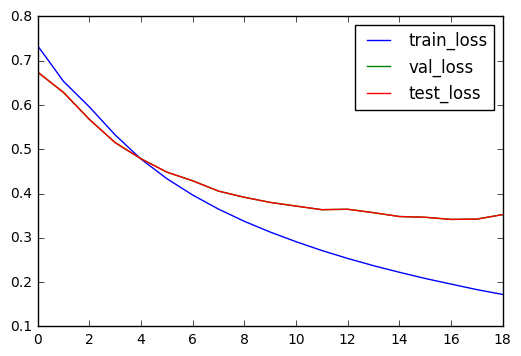

In [28]:
# 'val_loss' 顯示不出來
hist_info[['train_loss','val_loss','test_loss']].plot()

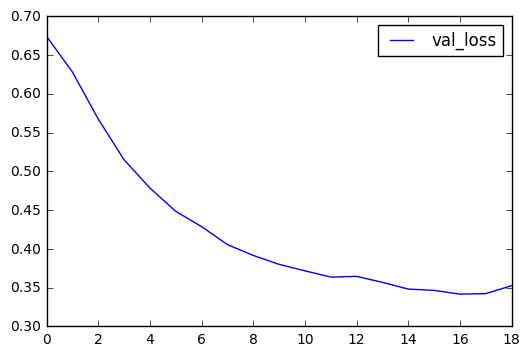

In [29]:
hist_info[['val_loss']].plot()

# 繪圖觀看準確率

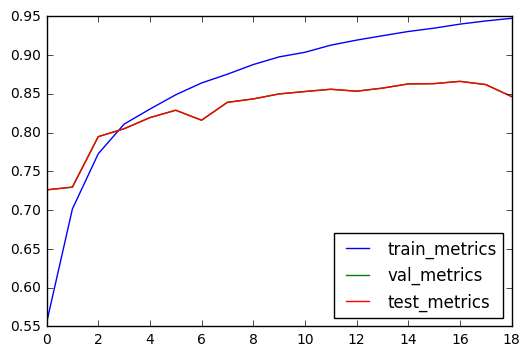

In [30]:
#hist_info[['acc','val_acc']].plot()
hist_info[['train_metrics', 'val_metrics','test_metrics']].plot()

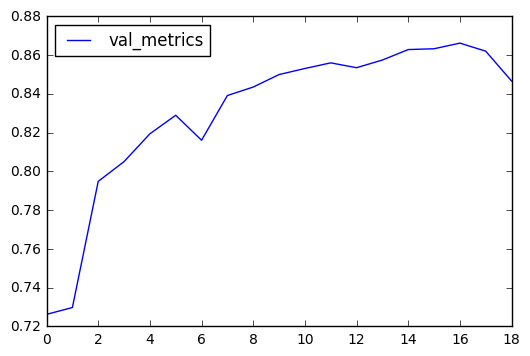

In [31]:
hist_info[['val_metrics']].plot()

# 觀看x_train內容

In [32]:
x_train

array([[    0,     0,     0, ...,    75,    27,    90],
       [    0,     0,     0, ...,   363,  2591,    46],
       [    0,     0,     0, ...,  4995,   514,  7987],
       ...,
       [    0,     0,     0, ...,  2467,  1374,  1253],
       [    0,     0,     0, ...,    36,   561,  1521],
       [    0,     0,     0, ..., 32407,   611,   977]], dtype=int32)

In [33]:
# 256個
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [34]:
x_test

array([[    0,     0,     0, ...,  8958,  7924,  2253],
       [    0,     0,     0, ..., 20692,  7870, 20312],
       [    0,     0,     0, ...,  1015,  8550,   669],
       ...,
       [    0,     0,     0, ...,    79,   110,   434],
       [    0,     0,     0, ...,   137,    88,   660],
       [    0,     0,     0, ..., 21416,  5648,  5236]], dtype=int32)

# 計算準確率

In [35]:
score ,acc = model.evaluate(x_test, y_test, batch_size= 16)

4807/4807 [==============================] - 1s 123us/step


In [36]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.35256090852065197
Test accuracy: 0.8466819221967964


# 以下的部份 還有錯誤  要找一下原因

# 用混淆矩陣計算

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
pred = model.predict_classes(df['label'], verbose=0)

In [36]:
# 預測分類筆數
len(pred)

24033

In [37]:
pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
# 真實筆數
len(df['label'])

24033

## 預測分類  都只有0跟1  如何調整成一樣的  目前似乎都是分類成1

In [39]:
# (y_true, y_pred, normalize=True, sample_weight=None)
accuracy_score(df['label'] , pred)

0.5205342653850955

In [74]:
# Confusion Matrix 分類結果之混和矩陣
# Compute confusion matrix
confusion_matrix(df['label'] , pred)

array([[12510,     0],
       [11523,     0]])

In [66]:
#Classification Report
print(classification_report(df['label'] , pred))

             precision    recall  f1-score   support

          1       0.52      1.00      0.68     12510
          2       0.00      0.00      0.00     11523

avg / total       0.27      0.52      0.36     24033



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
model.predict_proba(df['label'])[0:10]

array([[3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09]], dtype=float32)

In [92]:
model.predict(df['label'])[0:10]

array([[3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09],
       [3.5104578e-12, 1.0000000e+00, 1.5942740e-09]], dtype=float32)

# **2.1 Change Preprocessings**

Next, I change some parameters and preprocessings to improve fastText model.
## **2.1.1 Do lower case**

In [40]:
docs = create_docs(df)
tokenizer = Tokenizer(lower=True, filters='')
tokenizer.fit_on_texts(docs)
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

tokenizer = Tokenizer(num_words=num_words, lower=True, filters='')
tokenizer.fit_on_texts(docs)
docs = tokenizer.texts_to_sequences(docs)

maxlen = 256

docs = pad_sequences(sequences=docs, maxlen=maxlen)

input_dim = np.max(docs) + 1

# 自己繪圖展示train, validation, test準確率

In [ ]:
%matplotlib inline
from keras.callbacks import Callback
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_epoch_end(self,epoch, logs={}):
        x, y = X_test, Y_test
        lss, acc = self.model.evaluate(x, y, verbose=0)
        #self.losses.append([logs.get('loss'),logs.get('acc'),logs.get('val_loss'),logs.get('val_acc'),lss, acc])
        self.losses.append({'train_loss':logs.get('loss'),'train_metrics':logs.get('acc'),
                            'val_loss':logs.get('val_loss'),'val_metrics':logs.get('val_acc'),
                            'test_loss':lss,'test_metrics':acc,
                           })

In [41]:
%%time
epochs = 25
x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.2)

history = LossHistory()
model = create_model()

hist = model.fit(x_train, y_train,
                 batch_size=16,
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 callbacks=[ history , EarlyStopping(patience=2, monitor='val_loss')])

Train on 19226 samples, validate on 4807 samples
Epoch 1/25
19226/19226 [==============================] - 25s 1ms/step - loss: 0.7286 - acc: 0.5657 - val_loss: 0.6761 - val_acc: 0.6601
Epoch 2/25
19226/19226 [==============================] - 25s 1ms/step - loss: 0.6556 - acc: 0.6907 - val_loss: 0.6374 - val_acc: 0.7477
Epoch 3/25
19226/19226 [==============================] - 28s 1ms/step - loss: 0.6026 - acc: 0.7786 - val_loss: 0.5842 - val_acc: 0.7859
Epoch 4/25
19226/19226 [==============================] - 28s 1ms/step - loss: 0.5414 - acc: 0.8045 - val_loss: 0.5345 - val_acc: 0.7897
Epoch 5/25
19226/19226 [==============================] - 29s 2ms/step - loss: 0.4869 - acc: 0.8270 - val_loss: 0.4948 - val_acc: 0.8101
Epoch 6/25
19226/19226 [==============================] - 28s 1ms/step - loss: 0.4428 - acc: 0.8410 - val_loss: 0.4671 - val_acc: 0.8178
Epoch 7/25
19226/19226 [==============================] - 28s 1ms/step - loss: 0.4060 - acc: 0.8573 - val_loss: 0.4410 - val_acc:

# 表格方式觀看loss , metrics

In [ ]:
hist_info

# History繪圖 觀看模型訓練的收斂過程

In [42]:
#hist_info2 = pd.DataFrame(hist.history)

hist_info = pd.DataFrame(history.losses)

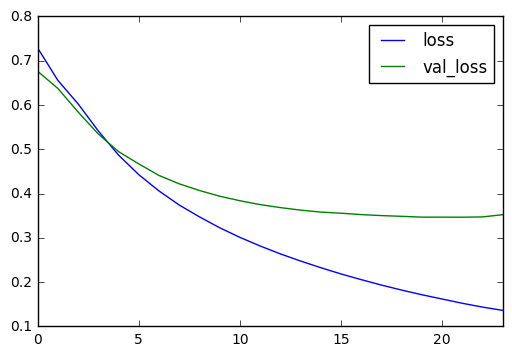

In [43]:
hist_info[['train_loss','val_loss', 'test_loss']].plot()

# 繪圖觀看metrics

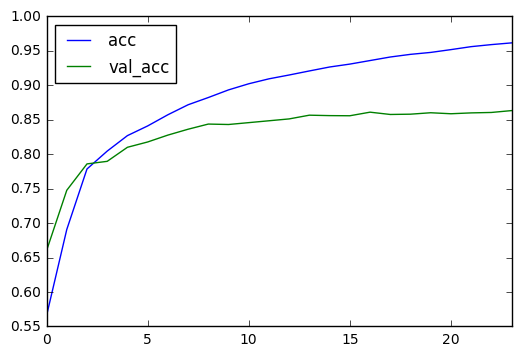

In [44]:
hist_info2[['train_metrics', 'val_metrics','test_metrics',]].plot()